In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load speech file

In [63]:
# load data from pickle file
import pickle

pickle_in = open("speeches.pickle", "rb")
speech_df = pickle.load(pickle_in)

In [64]:
speech_df.head()

type          speaker  date  \
0  convention  Hillary Clinton  2016   
1  convention      Robert Dole  1996   
2  convention   George W. Bush  2000   
3  convention   George W. Bush  2004   
4  convention      John McCain  2008   

                                              speech  
0  Thank you all for the great convention that we...  
1  The folks in Hollywood would be happy to know ...  
2  Thank you. Thank you for this honor. [,],Thank...  
3  When I said those words 4 years ago, none of u...  
4  Tonight, I have a privilege given few American...

In [65]:
speech_text = speech_df['speech']

In [201]:
speech_df['tag'] = speech_df['date'].apply(str) + ' ' + speech_df['type']

In [202]:
speech_df.head()

type          speaker  date  \
0  convention  Hillary Clinton  2016   
1  convention      Robert Dole  1996   
2  convention   George W. Bush  2000   
3  convention   George W. Bush  2004   
4  convention      John McCain  2008   

                                              speech              tag  
0  Thank you all for the great convention that we...  2016 convention  
1  The folks in Hollywood would be happy to know ...  1996 convention  
2  Thank you. Thank you for this honor. [,],Thank...  2000 convention  
3  When I said those words 4 years ago, none of u...  2004 convention  
4  Tonight, I have a privilege given few American...  2008 convention

## Sentiment Analysis

In [21]:
from textblob import TextBlob

In [36]:
speech_text[0:3]

0    Thank you all for the great convention that we...
1    The folks in Hollywood would be happy to know ...
2    Thank you. Thank you for this honor. [,],Thank...
Name: speech, dtype: object

In [54]:
polarity_list = []
subjectivity_list = []

for speech in speech_text:
    polarity_list.append(TextBlob(speech).sentiment[:][0])
    subjectivity_list.append(TextBlob(speech).sentiment[:][1])

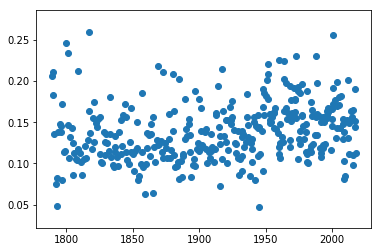

In [67]:
fig, ax = plt.subplots()
ax.scatter(speech_df['date'], polarity_list);

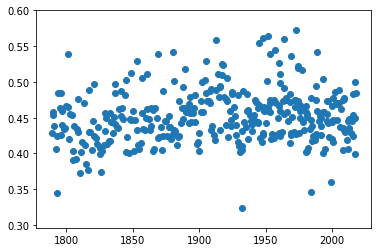

In [68]:
fig, ax = plt.subplots()
ax.scatter(speech_df['date'], subjectivity_list);

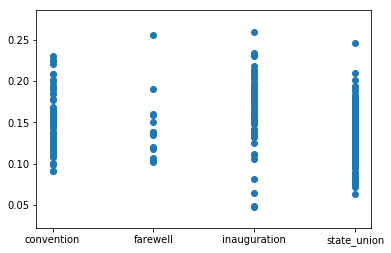

In [69]:
fig, ax = plt.subplots()
ax.scatter(speech_df['type'], polarity_list);

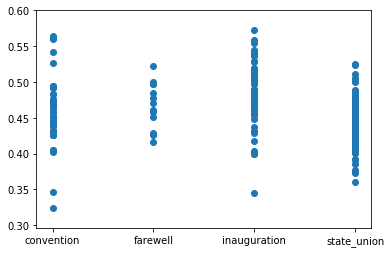

In [70]:
fig, ax = plt.subplots()
ax.scatter(speech_df['type'], subjectivity_list);

## Keyword searching


In [112]:
import nltk
from nltk.tokenize import wordpunct_tokenize

Pattern of self vs collective references

In [90]:
# define pronouns to search for

i_words = ['i', 'me', 'my', 'mine', 'myself']
we_words = ['we', 'us', 'our', 'ours', 'ourselves']
u_words = ['you', 'your', 'yours', 'yourself', 'yourselves']
third_words = ['he', 'him', 'his', 'himself', 
               'she', 'her', 'hers', 'herself', 
               'they', 'them', 'their', 'theirs', 'themselves']

In [196]:
# tfidf leave pronouns in 

remove = ['.', ',', '(', ')', "'", '"', '?', '!', '.,', '...', 'applause', 'laughter']

i_per = []
we_per = []
u_per = []
third_per = []

for speech in speech_text:

    words = wordpunct_tokenize(speech)
    words = [w.lower() for w in words if w not in remove]
    
    freqs = Counter()
    
    for word in words:
        if word in i_words:
            freqs['i_words'] += 1
        elif word in we_words:
            freqs['we_words'] += 1
        elif word in u_words:
            freqs['u_words'] += 1
        elif word in third_words:
            freqs['third_words'] += 1
        else:
            pass

    i_per.append(freqs['i_words'] / len(words) * 100)
    we_per.append(freqs['we_words'] / len(words) * 100)
    u_per.append(freqs['u_words'] / len(words) * 100)
    third_per.append(freqs['third_words'] / len(words) * 100)

# print(i_per)
# print(we_per)
# print(u_per)
# print(third_per)
    

In [206]:
pd.DataFrame({'speech': speech_df['tag'], 'i_words': i_per, 'we_words': we_per, 'u_words': u_per, 'third_words': third_per})

i_words            speech  third_words   u_words  we_words
0    2.415202   2016 convention     2.503996  1.900195  4.120050
1    3.720137   1996 convention     1.467577  1.450512  2.064846
2    2.661771   2000 convention     1.996329  0.917852  3.717302
3    2.014195   2004 convention     1.803184  0.863227  3.913294
4    5.506750   2008 convention     2.528391  1.457039  3.342618
5    2.408202   2012 convention     2.288984  1.406772  3.147353
6    2.596172   2016 convention     2.311920  0.701156  3.600531
7    0.682349   1916 convention     1.777698  0.017957  2.747351
8    1.864690   1928 convention     0.968205  0.047813  1.171408
9    1.867456   1932 convention     1.320884  0.364382  2.117969
10   0.974184   1936 convention     2.338042  0.194837  2.727716
11   3.031146   1940 convention     1.751947  0.417130  1.334816
12   1.202186   1944 convention     1.912568  0.437158  2.131148
13   2.500919   1948 convention     3.273262  0.478117  0.919456
14   4.307869   1952 convention     1.033889  2.010339  2.354968
15   2.341996   1956 convention     0.994546  0.866218  4.170677
16   2.790698   1864 convention     1.395349  2.325581  0.000000
17   0.604230   1880 convention     0.855992  0.151057  1.560926
18   1.084378   1888 convention     1.660454  0.101660  1.931549
19   0.713805   1892 convention     1.171717  0.026936  1.481481
20   0.830078   1900 convention     1.025391  0.292969  3.076172
21   0.369428   1908 convention     1.412035  0.008210  0.697808
22   2.808989   1916 convention     0.224719  0.674157  4.943820
23   1.124243   1920 convention     0.763909  0.072067  2.853848
24   1.213916   1924 convention     1.287935  0.014804  2.353812
25   1.477833   1932 convention     1.436782  0.027367  2.969349
26   3.879310   1932 convention     1.293103  1.724138  3.017241
27   2.631579   1940 convention     2.070175  0.526316  3.052632
28   1.497006   1944 convention     1.283148  0.513259  3.421728
29   1.289398   1948 convention     1.002865  1.002865  4.871060
..        ...               ...          ...       ...       ...
326  0.851882  1835 state_union     1.584684  0.155720  1.309884
327  0.945678  1834 state_union     1.092295  0.175940  1.062972
328  0.913756  1833 state_union     1.189135  0.413068  0.826136
329  0.840231  1832 state_union     1.529972  0.426386  1.931277
330  0.916617  1816 state_union     1.271437  0.000000  0.916617
331  0.157778  1815 state_union     1.262228  0.031556  0.820448
332  0.091715  1814 state_union     2.048303  0.061143  1.436869
333  0.183318  1812 state_union     1.466544  0.091659  1.283226
334  0.393873  1811 state_union     1.400438  0.481400  2.144420
335  0.406669  1810 state_union     0.813339  0.325336  0.935340
336  0.435019  1809 state_union     0.815661  0.271887  1.848831
337  0.853116  1808 state_union     1.891691  0.259644  2.040059
338  0.498960  1807 state_union     2.203742  0.374220  2.702703
339  0.415225  1806 state_union     2.387543  0.519031  1.730104
340  0.474415  1805 state_union     2.338190  0.406642  2.778719
341  0.330033  1804 state_union     2.357379  0.754361  2.310231
342  0.304480  1803 state_union     1.652893  0.608960  2.653328
343  0.270880  1802 state_union     1.354402  0.632054  2.844244
344  0.647549  1801 state_union     2.004317  0.678384  2.374345
345  0.723066  1800 state_union     1.229212  0.867679  2.386117
346  1.321877  1799 state_union     1.520159  0.462657  1.454065
347  0.628648  1798 state_union     1.481814  0.493938  2.110463
348  1.021898  1797 state_union     1.800487  0.389294  1.313869
349  0.940111  1796 state_union     1.357939  0.243733  0.974930
350  1.168106  1795 state_union     0.964957  0.457085  2.844083
351  1.064926  1794 state_union     2.026795  0.206115  1.064926
352  1.122449  1793 state_union     1.581633  0.561224  1.224490
353  1.438159  1792 state_union     1.150527  0.814957  0.719080
354  0.400000  1791 state_union     1.333333  1.155556  0.177778
355  1.084599  1790 state_union     1.590

[2.4152015627774817,
 3.720136518771331,
 2.6617714547957783,
 2.014195281028199,
 5.5067495178915795,
 2.408202193609919,
 2.5961720674625735,
 0.682348716107021,
 1.8646904135787714,
 1.8674561603279436,
 0.974184120798831,
 3.0311457174638488,
 1.2021857923497268,
 2.500919455682236,
 4.30786904078116,
 2.3419955085017645,
 2.7906976744186047,
 0.6042296072507553,
 1.0843781768891902,
 0.7138047138047138,
 0.830078125,
 0.3694277973893769,
 2.8089887640449436,
 1.12424329778034,
 1.2139156180606958,
 1.477832512315271,
 3.8793103448275863,
 2.631578947368421,
 1.4970059880239521,
 1.2893982808022924,
 2.4200518582541055,
 1.2304987914744012,
 2.3356871265616514,
 1.5165583410708758,
 1.5762925598991173,
 2.337190832766054,
 3.273709078636517,
 1.3758599124452784,
 0.614050930106556,
 3.604179995734698,
 3.589940487617585,
 1.8691588785046727,
 2.1804189824711417,
 2.5210084033613445,
 1.8271792919680243,
 1.2080536912751678,
 1.7626562820250051,
 3.606428851430812,
 2.35971223021582

In [99]:
lemma=nltk.stem.WordNetLemmatizer()

In [118]:


for word in words:
    words = lemma.lemmatize(words)

TypeError: unhashable type: 'list'

In [76]:
from nltk.tokenize import word_tokenize
samp_sent = "I've only got won't this we've thought, you'd have don't will"
words = word_tokenize(samp_sent)
words

['I',
 "'ve",
 'only',
 'got',
 'wo',
 "n't",
 'this',
 'we',
 "'ve",
 'thought',
 ',',
 'you',
 "'d",
 'have',
 'do',
 "n't",
 'will']

In [77]:
from nltk.tokenize import wordpunct_tokenize
words2 = wordpunct_tokenize(samp_sent)
words

['I',
 "'ve",
 'only',
 'got',
 'wo',
 "n't",
 'this',
 'we',
 "'ve",
 'thought',
 ',',
 'you',
 "'d",
 'have',
 'do',
 "n't",
 'will']

In [88]:
# stem words

stemmer = nltk.stem.porter.PorterStemmer()
for word in TextBlob("You've my me your got ours and ourselves and mine and yours").words:
    print(stemmer.stem(word))

you
've
my
me
your
got
our
and
ourselv
and
mine
and
your


In [93]:
# lem

lemma=nltk.stem.WordNetLemmatizer()

for word in TextBlob("You've, my me your got ours and ourselves and mine but theirs").words:
    print(lemma.lemmatize(word))

You
've
my
me
your
got
ours
and
ourselves
and
mine
but
theirs


In [94]:
speech1 = speech_text[0]

In [101]:
wordz = wordpunct_tokenize(speech1)

In [105]:
words[5]

'e'

## Pre-processing

In [6]:
from textblob import TextBlob
from nltk.util import ngrams

from collections import Counter
from operator import itemgetter

counter = Counter()

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
stop = set(stop)

n = 3
for doc in speech_text:
    words = TextBlob(doc.lower()).words  # tokenize words
    words = [w for w in words if w not in stop]   
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)

for phrase, count in counter.most_common(30):
    print('%20s %i' % (" ".join(phrase), count))

citizens united states 183
      ending june 30 177
government united states 175
    year ending june 168
people united states 161
    last fiscal year 145
  fiscal year ending 144
last session congress 141
 last annual message 138
president united states 132
united states america 116
 united states great 104
  part united states 100
states great britain 89
congress last session 82
    next fiscal year 76
report secretary war 76
 present fiscal year 75
report secretary treasury 69
    year ending 30th 68
 current fiscal year 67
united states government 66
report secretary navy 66
       ended june 30 65
     year ended june 64
constitution united states 62
    fiscal year 1947 62
interstate commerce commission 60
        world war ii 59
  bank united states 59


## TFIDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9,
                                 min_df=0.1, stop_words='english',
                                 ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(speech_text)

In [12]:
tfidf_matrix.shape

(356, 3749)

In [17]:
terms = tfidf_vectorizer.get_feature_names()

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix)

## Clustering

In [1]:
from sklearn.cluster import KMeans

In [6]:
def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [8]:
SSEs = []
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_digits)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(X_digits, labels, metric='euclidean'))
    SSEs.append(get_SSE(X_digits, labels)) # The SSE is just inertia, we
                                            # could have just said km.inertia_

NameError: name 'X_digits' is not defined

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');